In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests 
import numpy as np

pd.options.display.float_format = '{:.2f}'.format

In [2]:
dfX = pd.read_csv('dfX.csv')

Text(0, 0.5, 'Dew Point (Celsius)')

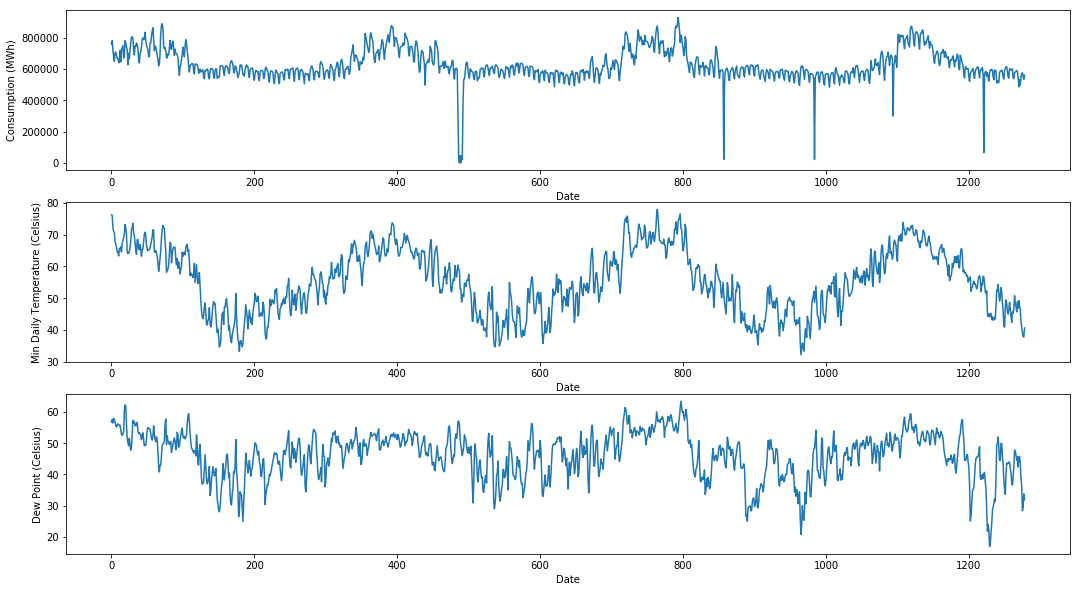

In [3]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=3, figsize=(18, 10))
#start_date = ["2016-01-01","2017-01-01","2018-01-01"]
#end_date = ["2016-12-31","2017-12-31","2018-12-31"]
 
#ax0.set_title('CAISO Consumption 2016 - 2018')
ax0.plot(dfX['CAISO_HourlyLoad'])
ax0.set_xlabel('Date')
ax0.set_ylabel('Consumption (MWh)')
ax1.plot(dfX['temperatureMin'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Min Daily Temperature (Celsius)')
ax2.plot(dfX['dewPoint'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Dew Point (Celsius)')

#df2017.head()

In the top axis, in which the CAISO load is modelled for the duration of the time series (July 2015 through December 2018), it can be observed that there are a few instances in which the load drops to abnormal levels. In the histogram below, we can see the outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120893048>]],
      dtype=object)

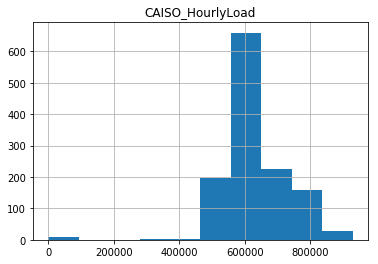

In [27]:
dfX.hist('CAISO_HourlyLoad')

In [28]:
dfOutliers = dfX[dfX['CAISO_HourlyLoad'] < 400000]
#print(dfOutliers.shape[0])
dfOutliers

,DateTime,CAISO_HourlyLoad,isWeekend,Month,DayofYear,CA_CustomerCount,apparentTemperatureHigh,apparentTemperatureLow,apparentTemperatureMax,apparentTemperatureMin,...,temperatureLow,temperatureMax,temperatureMin,uvIndex,visibility,windBearing,windGust,windSpeed,GDP,CAPOP
485,2016-10-28 00:00:00-07:00,280227.00,0,10,302,15083041.55,70.37,59.24,70.37,60.49,...,59.23,70.31,60.43,3.20,7.35,247.60,8.28,0.91,18973388.58,39365995.01
486,2016-10-29 00:00:00-07:00,20549.00,1,10,303,15074552.16,74.68,61.28,74.68,59.02,...,61.27,74.68,59.02,3.40,7.86,187.80,9.50,1.59,18975340.72,39366516.16
487,2016-10-30 00:00:00-07:00,0.00,1,10,304,15066062.77,67.21,53.52,67.48,58.60,...,53.52,67.47,58.60,3.00,8.38,220.00,12.29,2.63,18977292.86,39367037.32
488,2016-10-31 00:00:00-07:00,45683.00,0,10,305,15057573.39,65.27,53.01,65.27,52.94,...,53.01,65.27,52.94,3.40,8.96,248.60,9.15,1.63,18979245.00,39367558.47
489,2016-11-01 00:00:00-07:00,0.00,0,11,306,15049084.00,67.01,48.77,67.01,52.87,...,48.77,67.01,52.87,3.40,9.06,284.80,9.75,1.33,18981237.45,39368079.63
490,2016-11-02 00:00:00-07:00,43185.00,0,11,307,15066988.80,69.96,50.18,69.96,48.77,...,50.36,69.96,48.77,3.80,8.71,290.00,7.46,0.74,18983229.89,39368600.79
491,2016-11-03 00:00:00-07:00,20181.00,0,11,308,15084893.60,74.45,51.27,74.45,50.18,...,51.27,74.45,50.36,3.80,7.91,259.40,7.51,0.51,18985222.34,39369121.94
492,2016-11-04 00:00:00-07:00,380091.00,0,11,309,15102798.40,76.78,50.50,76.78,51.27,...,50.50,76.78,51.27,3.60,7.14,249.40,6.33,0.66,18987214.78,39369643.10
857,2017-11-04 00:00:00-07:00,22556.00,1,11,308,15429054.60,65.87,49.86,65.87,51.00,...,49.86,65.87,51.08,3.00,8.96,273.60,8.63,1.17,19840925.43,39531986.46
984,2018-03-11 00:00:00-08:00,21226.00,1,3,70,15545526.45,69.62,51.10,69.62,48.68,...,51.10,69.62,48.68,5.40,8.18,266.80,7.38,0.79,20203566.13,39589930.40


Based on the outlier data, we can see that there are a handful of dates in which CAISO Load is nonsensical. Therefore, by choosing a threshold of 400,000, most of the outliers are eliminated, and trends are much more easily recognized in the data. We decided to move forward by eliminating these outliers as doing so drastically improved the accuracy of our regression predictions (from ~75% to ~86%)

In [17]:
dfX = dfX[dfX['CAISO_HourlyLoad'] > 400000]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f060d30>]],
      dtype=object)

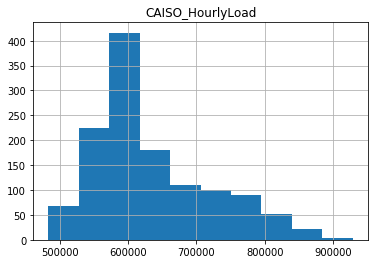

In [18]:
dfX.hist('CAISO_HourlyLoad')

Text(0,0.5,'Dew Point (Celsius)')

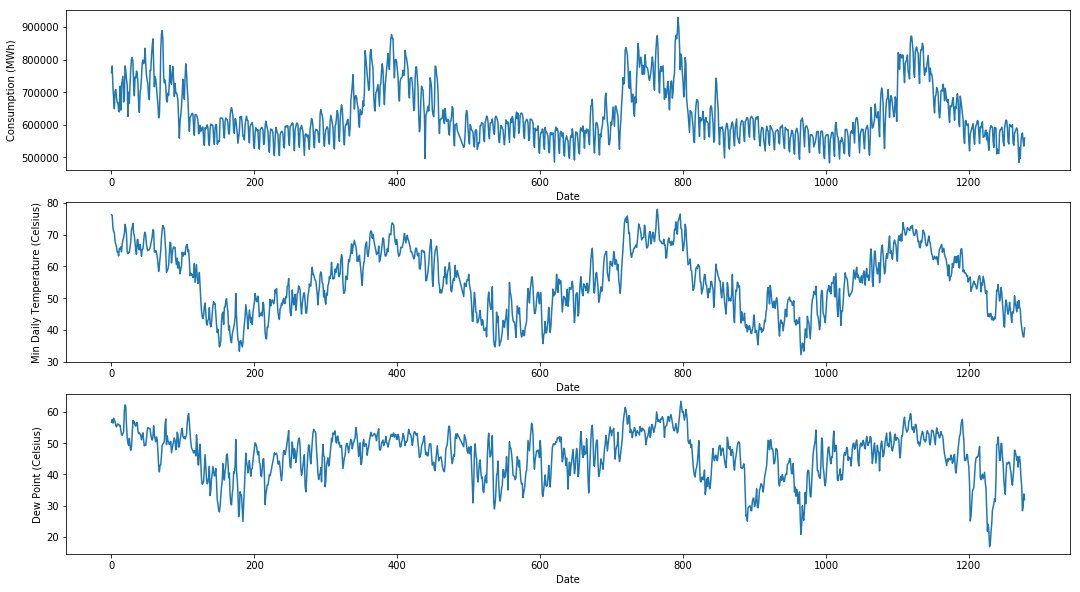

In [19]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=3, figsize=(18, 10))
#start_date = ["2016-01-01","2017-01-01","2018-01-01"]
#end_date = ["2016-12-31","2017-12-31","2018-12-31"]
 
#ax0.set_title('CAISO Consumption 2016 - 2018')
ax0.plot(dfX['CAISO_HourlyLoad'])
ax0.set_xlabel('Date')
ax0.set_ylabel('Consumption (MWh)')
ax1.plot(dfX['temperatureMin'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Min Daily Temperature (Celsius)')
ax2.plot(dfX['dewPoint'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Dew Point (Celsius)')

Therefore, we chose to move forward with the filtered data. 

In [4]:
dfX.head()

,DateTime,CAISO_HourlyLoad,isWeekend,Month,DayofYear,CA_CustomerCount,apparentTemperatureHigh,apparentTemperatureLow,apparentTemperatureMax,apparentTemperatureMin,...,temperatureLow,temperatureMax,temperatureMin,uvIndex,visibility,windBearing,windGust,windSpeed,GDP,CAPOP
0,2015-07-01 00:00:00-07:00,759794.00,0,7,182,15720942.00,99.14,76.57,99.14,76.39,...,76.35,98.33,76.21,9.20,8.45,191.60,13.93,1.19,18295290.61,39080082.51
1,2015-07-02 00:00:00-07:00,780410.00,0,7,183,15696530.84,96.23,72.28,96.23,76.17,...,72.22,95.88,76.04,9.80,8.40,247.40,11.84,1.94,18296484.02,39080783.84
2,2015-07-03 00:00:00-07:00,719208.00,0,7,184,15672119.68,96.16,71.09,96.16,72.28,...,71.05,96.01,72.22,10.40,8.95,254.40,11.07,2.23,18297677.43,39081485.16
3,2015-07-04 00:00:00-07:00,678520.00,1,7,185,15647708.52,97.32,70.61,97.32,70.97,...,70.60,96.99,70.95,10.20,9.02,249.20,12.00,2.38,18298870.85,39082186.49
4,2015-07-05 00:00:00-07:00,649346.00,1,7,186,15623297.35,92.23,67.74,92.23,70.61,...,67.73,92.20,70.60,9.80,9.01,247.40,12.47,3.15,18300064.26,39082887.82
